In [16]:
#PROBLEM 1

import matplotlib.pyplot as plt
from pylab import *
import numpy as np

In [17]:
#import integrate
#====================
G    = 6.67*10.**-11.     #Gravitational Constant m^3/kg/s^2
M    = 1.98*10.**30       #Solar mass kg
GM   = 4*np.pi**2         #Scaled value.
DS   = 1.496*10**11       #Distance to the Sun m
x01  = 2.52               #Initial body one x AU
y01  = 0.                 #Initial body one y AU
vy01 = np.sqrt(GM/x01)   #Initial body one x velocity   m/s
vx01 = 0.0                #Initial body one y velocity....m/s
x02  = 0.00               #Initial body two x....AU
y02  = 5.24               #Initial body two y ...AU
vy02 = 0.0                #Initial body two x velocity..m/s
vx02 = np.sqrt(GM/y02)   #Initial body two y velocity...m/s
m1   = .001*GM            #Body one mass..Solar Masses
m2   = .040*GM            #Body two mass..Solar Masses
t0   = 0.0                #Initial time...s

In [18]:
def Orbital_acc(y,t):
    r1 = np.array([y[0], y[1]])
    r2 = np.array([y[2], y[3]])
    r21 = r2-r1    
    magr1 = np.sqrt(r1.dot(r1))
    magr2 = np.sqrt(r2.dot(r2))
    magr21 = np.sqrt(r21.dot(r21))
    A1 = (-GM * r1) / magr1**3 + (m2 * (r21)) / magr21**3
    A2 = (-GM * r2) / magr2**3 - (m1 * (r21)) / magr21**3
 
    return array([y[4], y[5], y[6], y[7], A1[0], A1[1], A2[0], A2[1]])

In [19]:
def Total_energy(x1, x2, v1, v2):
    r1  = sqrt(x1[0]**2 + x1[1]**2)
    r2  = sqrt(x2[0]**2 + x2[1]**2)
    r21 = sqrt((x2[0]-x1[0])**2 + (x2[1]-x1[1])**2)
 
    KE  = .5*(m1*(v1[0]**2+v1[1]**2) + m2*(v2[0]**2+v2[1]**2))/GM
    PE  = -(m1/r1 + m2/r2 + m1*m2/r21/GM)
 
    return KE + PE

In [20]:
def runge_kutta_4th_order(t,x, f, dt):
    k1 = f(x , t) * dt
    k2 = f(x + 0.5 * k1, t) * dt
    k3 = f(x + 0.5 * k2, t) * dt
    k4 = f(x + k3, t) * dt
    return x + (k1 + 2 * k2 + 2 * k3 + k4) / 6.0
 
 
y0=[x01, y01, x02, y02, vx01, vy01, vx02, vy02]

In [24]:
#Runge-Kutta
dt=0.002
Rk4_time = arange(0, 100, dt)
Rk4_y = [y0]
for i in range (1,len(Rk4_time)):
    t=Rk4_time[i]
    Rk4_y.append(runge_kutta_4th_order(t, Rk4_y[-1], Orbital_acc, dt))
 
Rk4_y = np.array(Rk4_y)
Rk4_xy  = array([Rk4_y[:,0], Rk4_y[:,1]])
Rk4_xy2 = array([Rk4_y[:,2], Rk4_y[:,3]])
Rk4_v1  = array([Rk4_y[:,4], Rk4_y[:,5]])
Rk4_v2  = array([Rk4_y[:,6], Rk4_y[:,7]])
x,y=Rk4_y[:,0],Rk4_y[:,1]
x2,y2=Rk4_y[:,2], Rk4_y[:,3]
#======================
#Calculate the energy
rungeE = Total_energy(Rk4_xy, Rk4_xy2, Rk4_v1, Rk4_v2)
print(rungeE)
#Calculate the changes in energy
deltarungeE = (rungeE  - rungeE[0])/np.abs(rungeE[0])

display(len(x))
display(len(Rk4_time))

[-0.15878559 -0.15878559 -0.15878559 ... -0.15878559 -0.15878559
 -0.15878559]


50000

50000

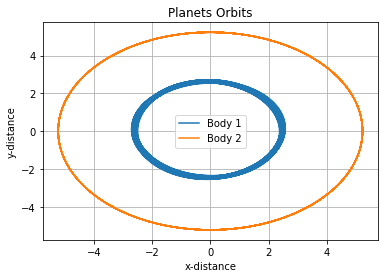

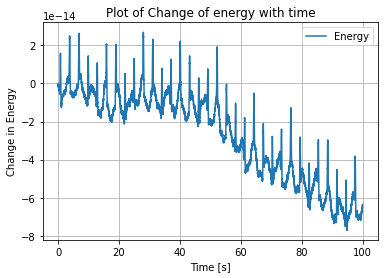

In [25]:
#Plotting 
plt.figure()
# plots needed
plt.plot(x,y,label='Body 1')
plt.plot(x2,y2,label='Body 2')
plt.legend()
plt.grid()
plt.xlabel('x-distance')
plt.ylabel('y-distance')
# displaying the title
plt.title("Planets Orbits")

plt.figure()
plt.plot(Rk4_time,deltarungeE, label="Energy")
plt.legend()
plt.grid()
plt.xlabel('Time [s]')
plt.ylabel('Change in Energy')
# displaying the title
plt.title("Plot of Change of energy with time")

plt.show()

In [12]:
#PROBLEM 2

import matplotlib.pyplot as plt
from pylab import *
import numpy as np

#import integrate
#====================
G    = 6.67*10.**-11.     #Gravitational Constant m^3/kg/s^2
M    = 1.98*10.**30       #Solar mass kg
GM   = 4*np.pi**2         #Scaled value.
DS   = 1.496*10**11       #Distance to the Sun m
m1   = .001*GM            #Earth mass.
m2   = .040*GM            #Jupiter mass.
t0   = 0.0                #Initial time.

# Earth initial Cond
x01  = 1               #Initial Earth x AU
y01  = 0.0                #Initial Earth y AU
vy01 = np.sqrt(GM/x01)   #Initial Earth x velocity   m/s
vx01 = 0.0                #Initial Earth y velocity....m/s
 
# Jupiter Initial Conditions
e=0.6
x02  = 4          #Initial Jupiter x....AU
y02  = 0.00               #Initial Jupiter y ...AU
vx02 = 0.0                #Initial Jupiter x velocity..m/s
vy02 = np.sqrt((GM)/(x02))  #Initial Jupiter y velocity...m/s 
#==========================

 
 



In [13]:
def Orbital_acc(y,t):
    r1 = np.array([y[0], y[1]])
    r2 = np.array([y[2], y[3]])
    r21 = r2-r1    
    magr1 = np.sqrt(r1.dot(r1))
    magr2 = np.sqrt(r2.dot(r2))
    magr21 = np.sqrt(r21.dot(r21))
    A1 = (-GM * r1) / magr1**3 + (m2 * (r21)) / magr21**3
    A2 = (-GM * r2) / magr2**3 - (m1 * (r21)) / magr21**3
 
    return array([y[4], y[5], y[6], y[7], A1[0], A1[1], A2[0], A2[1]])
 
def Total_energy(x1, x2, v1, v2):
    r1  = sqrt(x1[0]**2 + x1[1]**2)
    r2  = sqrt(x2[0]**2 + x2[1]**2)
    r21 = sqrt((x2[0]-x1[0])**2 + (x2[1]-x1[1])**2)
 
    KE  = .5*(m1*(v1[0]**2+v1[1]**2) + m2*(v2[0]**2+v2[1]**2))/GM
    PE  = -(m1/r1 + m2/r2 + m1*m2/r21/GM)
 
    return KE + PE
  
def runge_kutta_4th_order(t,x, f, dt):
    k1 = f(x , t) * dt
    k2 = f(x + 0.5 * k1, t) * dt
    k3 = f(x + 0.5 * k2, t) * dt
    k4 = f(x + k3, t) * dt
    return x + (k1 + 2 * k2 + 2 * k3 + k4) / 6.0
 
 
y0=[x01, y01, x02, y02, vx01, vy01, vx02, vy02]

In [11]:
#Runge-Kutta
from IPython.display import display

dt=0.001
Rk4_time = arange(0, 1, dt)
Rk4_y = [y0]
for i in range (1,len(Rk4_time)):
    t=Rk4_time[i]
    Rk4_y.append(runge_kutta_4th_order(t, Rk4_y[-1], Orbital_acc, dt))
 
Rk4_y = np.array(Rk4_y)
Rk4_xy  = array([Rk4_y[:,0], Rk4_y[:,1]]) 
Rk4_xy2 = array([Rk4_y[:,2], Rk4_y[:,3]])*(1-e) 
Rk4_v1  = array([Rk4_y[:,4], Rk4_y[:,5]]) 
Rk4_v2  = array([Rk4_y[:,6], Rk4_y[:,7]])*(1+e)/(1-e)  
x,y=Rk4_y[:,0] ,Rk4_y[:,1] 
x2,y2=Rk4_y[:,2]*(1-e) , Rk4_y[:,3]*(1-e) 
#======================
#Calculate the energy
rungeE = Total_energy(Rk4_xy, Rk4_xy2, Rk4_v1, Rk4_v2)
 
#Calculate the changes in energy
deltarungeE = (rungeE  - rungeE[0])/np.abs(rungeE[0])
print(deltarungeE)

display(len(x))
display(len(Rk4_time))

[0.00000000e+00 8.53243341e-08 3.41195471e-07 ... 5.89753397e-03
 5.89758826e-03 5.89763680e-03]


100000

100000

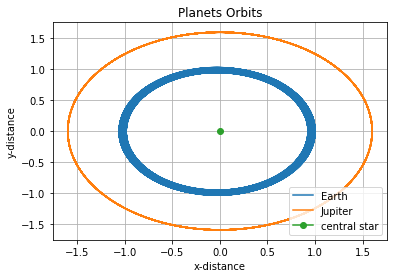

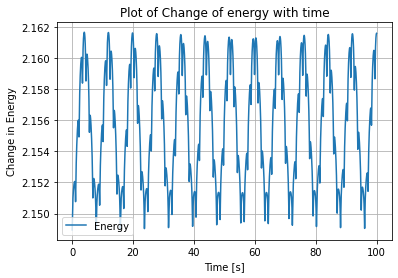

In [14]:
#Plotting 
plt.figure()
# plots needed
plt.plot(x,y,label='Earth')
plt.plot(x2,y2,label='Jupiter')
plt.plot(0,0, marker="o", label='central star')

plt.legend(loc="lower right")
plt.grid()
plt.xlabel('x-distance')
plt.ylabel('y-distance')
# displaying the title
plt.title("Planets Orbits")

plt.figure()
plt.plot(Rk4_time,rungeE, label="Energy")
plt.legend()
plt.grid()
plt.xlabel('Time [s]')
plt.ylabel('Change in Energy')
# displaying the title
plt.title("Plot of Change of energy with time")

plt.show()